# The analytic bang-bang solution

  
## Reach of the target

Let $t$ be the time variable, $T$ the time (in $s$) when the target is pointed, $x(t)$ and $\dot{x}(t)$ respectively the position and the velocity at time $t$, $x_T$ the position to reach, $\rho \in \left [0 ,1\right]$.  
$x(t=0) = 0$ and $\dot{x}(t=0) = 0$  
  
$\newcommand{\intervalle}[2]{\left[#1\mathclose{}\mathpunct{};#2\right]}
\newcommand{\intervallefo}[2]{\left[#1\mathclose{}\mathpunct{};#2\right[}
\newcommand{\intervalleof}[2]{\left]#1\mathclose{}\mathpunct{};#2\right]}
\newcommand{\intervalleoo}[2]{\left]#1\mathclose{}\mathpunct{};#2\right[}$  
$\forall t \in \intervalle{0}{\rho\cdot T} : u(t) = U_+$  
$\forall t \in \intervalleof{\rho\cdot T}{T} : u(t) = U_-$  
$\forall t \in \intervalleoo{T}{+\infty} : u(t) = U_{\infty}$  
  
Formally, 
$$
u(t) = \mathbb 1_{\intervalle{0}{\rho\cdot T}} \cdot U_+ + \mathbb 1_{\intervalleof{\rho\cdot T}{T}} \cdot U_- + \mathbb 1_{\intervalleoo{T}{+\infty}} \cdot U_\infty
$$

where $\mathbb 1_{\mathcal{I}}$ is the [indicator function](https://en.wiktionary.org/wiki/indicator_function#English) of the interval $\mathcal{I}$
  
We will solve the following differential equation, which represents a linear model of the eye, on the previous intervals:  
  
$$
\dfrac{d\dot{x}(t)}{dt} = -\frac{\beta}{m}\cdot\dot{x}(t)+\frac{1}{m}\cdot u(t)
$$

where $\beta$ and $m$ are constants of the eye, with $\left[\dfrac{\beta}{m}\right] = s^{-1}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
b = 100
m = 1
xT = 40
dt = 0.005
t_T = .1
t_R = .4
T = int(t_T/dt)
R = int(t_R/dt)
time = np.linspace(0, t_T+t_R, R+T+1)
time_ms = time*1000
v0 = 10. #velocity of the target

On $\intervalle{0}{\rho\cdot T}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{\beta}{m}\cdot\dot{x}(t)+\dfrac{U_+}{m}$  
  
We find:  $\dot{x}(t) = \frac{U_+}{\beta}\left (1-e^{- \frac{\beta}{m}t} \right )$ and so : $x(t) = \frac{U_+}{\beta}\left [t-\frac{m}{\beta}\left(1-e^{- \frac{\beta}{m}t} \right )\right]$

On $\intervalleof{\rho\cdot T}{T}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{\beta}{m}\cdot\dot{x}(t)+\dfrac{U_-}{m}$  
  
We find:  $\dot{x}(t) = \frac{U_-}{\beta}\left (1-e^{\frac{\beta}{m}\left (T-t\right)} \right )$ and so : $x(t) = x_T - \frac{U_-}{\beta}\left [T-t+\frac{m}{\beta}\left(1-e^{\frac{\beta}{m}\left (T-t\right)} \right )\right]$
 

On $\intervalleoo{T}{+\infty}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{\beta}{m}\cdot\dot{x}(t)+\dfrac{U_{\infty}}{m}$  
  
We find:  $U_{\infty} = 0$ since $\forall t \in \intervalleoo{T}{+\infty}, \dot{x}(t) = 0$ (and $\ddot{x}(t) = 0$) and so : $x(t) = x_T$
 

Then, we use the continuity of the velocity at time $\rho\cdot T$ to find relations between $U_+$, $U_-$ and $\rho$.  
  
We assume that $U_+ = U_{MAX}$ and $U_- = - U_{MAX}$.  
  
We deduce : $\dot{x}(\rho T) = \frac{U_{MAX}}{\beta}\left(1-e^{- \frac{\beta}{m}\rho T} \right ) = -\frac{U_{MAX}}{\beta}\left(1-e^{\frac{\beta}{m}\left(1-\rho\right)T} \right )$.  
  
Finally: $\rho = -\dfrac{m}{\beta T}\ln \left(\dfrac{2}{1+e^{\frac{\beta T}{m}}}\right)$

In [13]:
rho = m/(b*T*dt)*np.log((1+np.exp(b*T*dt/m))/2)
rhoT = int(np.round(T*rho))

The continuity of the position at time $\rho\cdot T $ enables to find $U_{MAX}: U_{MAX} = \dfrac{\beta}{\left (2\rho-1\right)T-\frac{m}{\beta}\left(2-e^{-\frac{\beta}{m}\rho T} - e^{\frac{\beta}{m}\left(1-\rho \right)T}\right)} \cdot  x_T$

Note: since the relation is linear, trajectories are linear in 2D for any target's position.

In [14]:
Umax = b*xT/((2*rho-1)*T*dt-m/b*(2-np.exp(-rho*b*T*dt/m)-np.exp((1-rho)*b*T*dt/m)))

In [15]:
x = np.concatenate((Umax/b*(time[0:rhoT]-m/b*(1-np.exp(-b/m*time[0:rhoT]))),xT+Umax/b*(T*dt-time[rhoT:T]+m/b*(1-np.exp(b/m*(T*dt-time[rhoT:T])))),xT*np.ones(R+1)))
v = np.concatenate((Umax/b*(1-np.exp(-b/m*time[0:rhoT])),-Umax/b*(1-np.exp(b/m*(T*dt-time[rhoT:T]))),np.zeros(R+1)))
u = np.concatenate((Umax*np.ones(rhoT),-Umax*np.ones(T-rhoT),np.zeros(R+1)))

In [16]:
u

array([ 46437.13175026,  46437.13175026,  46437.13175026,  46437.13175026,
        46437.13175026,  46437.13175026,  46437.13175026,  46437.13175026,
        46437.13175026,  46437.13175026,  46437.13175026,  46437.13175026,
        46437.13175026,  46437.13175026,  46437.13175026,  46437.13175026,
        46437.13175026,  46437.13175026,  46437.13175026, -46437.13175026,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,  

In [3]:
help(plt.step)

Help on function step in module matplotlib.pyplot:

step(x, y, *args, **kwargs)
    Make a step plot.
    
    Parameters
    ----------
    x : array_like
        1-D sequence, and it is assumed, but not checked,
        that it is uniformly increasing.
    
    y : array_like
        1-D sequence, and it is assumed, but not checked,
        that it is uniformly increasing.
    
    Returns
    -------
    list
        List of lines that were added.
    
    Other parameters
    ----------------
    where : [ 'pre' | 'post' | 'mid'  ]
        If 'pre' (the default), the interval from
        x[i] to x[i+1] has level y[i+1].
    
        If 'post', that interval has level y[i].
    
        If 'mid', the jumps in *y* occur half-way between the
        *x*-values.
    
    Notes
    -----
    Additional parameters are the same as those for
    :func:`~matplotlib.pyplot.plot`.
    
    .. note::
        In addition to the above described arguments, this function can take a
        **data

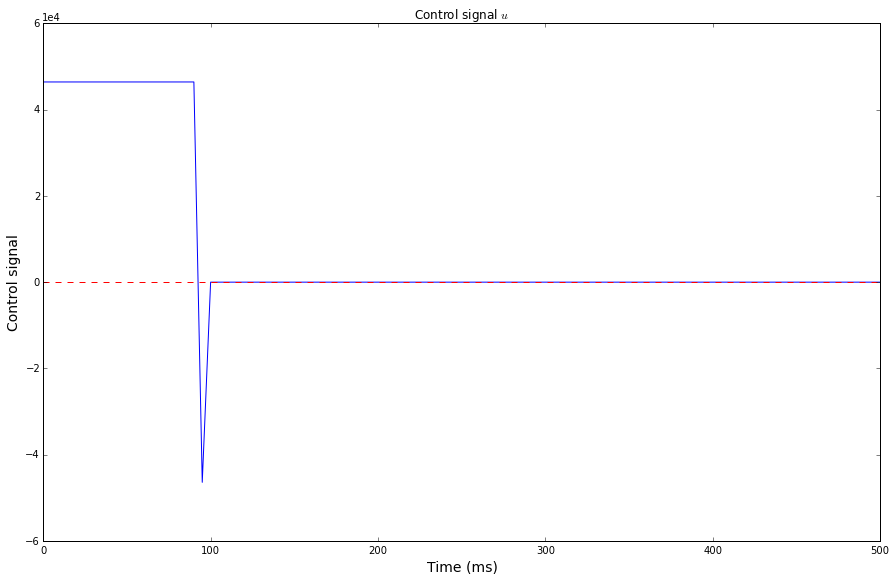

In [17]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(time_ms, u, '-')
ax.plot([0,(t_T+t_R)*1000],[0,0], 'r--')
ax.set_title(r'Control signal $u$')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('Control signal', fontsize=14)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))
#ax.set_xlim(0, 150)


(-0.5, 40.5)

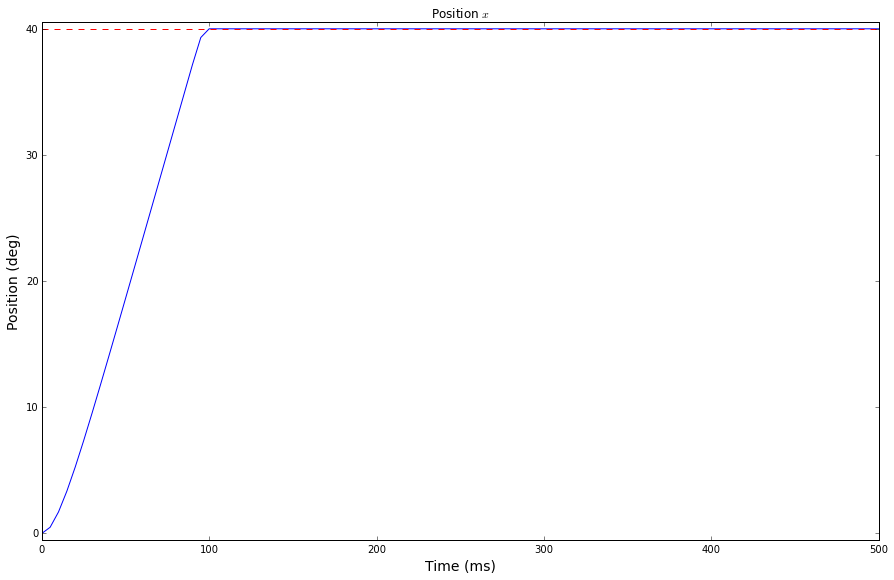

In [18]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(time_ms, x, '-')
ax.plot([0,(t_T+t_R)*1000],[xT,xT], 'r--')
ax.set_title(r'Position $x$')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('Position (deg)', fontsize=14)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))

ax.set_ylim(-0.5, xT+0.5)


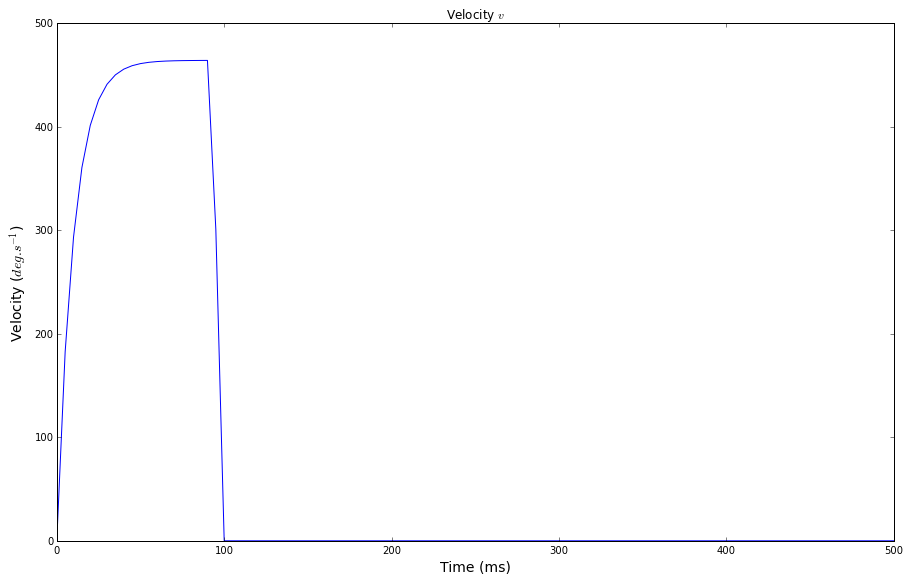

In [19]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(time_ms, v, '-')
ax.plot([0,(t_T+t_R)*1000],[0,0], 'r--')

ax.set_title(r'Velocity $v$')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel(r'Velocity ($deg.s^{-1}$)', fontsize=14)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))


## Reach and pursuit of the target

Here, the target is moving with the velocity $v$. We want to reach the moving target (which position at time $t$ is $x_T+v t$ and then follow it. 

Again, 
$$
u(t) = \mathbb 1_{\intervalle{0}{\rho\cdot T}} \cdot U_+ + \mathbb 1_{\intervalleof{\rho\cdot T}{T}} \cdot U_- + \mathbb 1_{\intervalleoo{T}{+\infty}} \cdot U_\infty
$$

We will solve the following differential equation, which represents a linear model of the eye, on the previous intervals:  
  
$$
\dfrac{d\dot{x}(t)}{dt} = -\frac{\beta}{m}\cdot\dot{x}(t)+\frac{1}{m}\cdot u(t)
$$

On $\intervalle{0}{\rho\cdot T}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{\beta}{m}\cdot\dot{x}(t)+\dfrac{U_+}{m}$  
  
We find:  $\dot{x}(t) = \frac{U_+}{\beta}\left (1-e^{- \frac{\beta}{m}t} \right )$ and so : $x(t) = \frac{U_+}{\beta}\left [t-\frac{m}{\beta}\left(1-e^{- \frac{\beta}{m}t} \right )\right]$

On $\intervalleof{\rho\cdot T}{T}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{\beta}{m}\cdot\dot{x}(t)+\dfrac{U_-}{m}$  
  
We find:  $\dot{x}(t) = \frac{U_-}{\beta}\left (1-e^{\frac{\beta}{m}\left (T-t\right)} \right ) + v\cdot e^{\frac{\beta}{m}\left (T-t\right)}$ and so : $x(t) = x_T +v\cdot T- \frac{U_-}{\beta}\left [T-t+\frac{m}{\beta}\left(1-e^{\frac{\beta}{m}\left (T-t\right)} \right )\right] + v\cdot \frac{m}{\beta}\left(1-e^{\frac{\beta}{m}\left (T-t\right)} \right )$

On $\intervalleoo{T}{+\infty}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{\beta}{m}\cdot\dot{x}(t)+\dfrac{U_{\infty}}{m}$  
  
We find:  $U_{\infty} = \beta\cdot v$ since $\forall t \in \intervalleoo{T}{+\infty}, \dot{x}(t) = v$ (and $\ddot{x}(t) = 0$) and so : $x(t) = v\cdot \left ( t - T \right)+x_T+v\cdot T$

Then, we use the continuity of the velocity at time $\rho\cdot T$ to find relations between $U_+$, $U_-$ and $\rho$.  
  
We assume that $U_+ = U_{MAX}$ and $U_- = - U_{MAX}$.  
  
We deduce : $\dot{x}(\rho T) = \frac{U_{MAX}}{\beta}\left(1-e^{- \frac{\beta}{m}\rho T} \right ) = -\frac{U_{MAX}}{\beta}\left(1-e^{\frac{\beta}{m}\left(1-\rho\right)T} \right )+v\cdot e^{\frac{\beta}{m}\left (1-\rho\right)T}$.  
  
Finally: $U_{MAX} = -\dfrac{\beta \cdot v \cdot e^{\frac{\beta}{m}\left (1-\rho\right)T}}{2-e^{-\frac{\beta}{m}\rho T}-e^{\frac{\beta}{m}\left (1-\rho\right)T}}$


The continuity of the position at time $\rho \cdot T$ enables to find the value of $\rho$.
Indeed, $\rho$ is the unique solution in $\intervalle{0}{1}$ of :
$$
\left(x_T+vT \right)\left(2-e^{-\frac{\beta}{m}\rho T}-e^{\frac{\beta}{m}\left (1-\rho\right)T}\right) +v\cdot\frac{m}{\beta}\left(1-e^{\frac{\beta}{m}\left (1-\rho\right)T}\right)\left(2-e^{-\frac{\beta}{m}\rho T}-e^{\frac{\beta}{m}\left (1-\rho\right)T}\right)-v\cdot e^{\frac{\beta}{m}\left (1-\rho\right)T}\left [\left(2\rho-1\right)T-\frac{m}{\beta}\left(2-e^{-\frac{\beta}{m}\rho T}-e^{\frac{\beta}{m}\left (1-\rho\right)T} \right )\right] = 0
$$

Numerically, we find $\rho$, and then we deduce $U_{MAX}$, which enables to compute the position and the velocity of the bangbang.

In [146]:
tau = m/b

(0.5, 1)

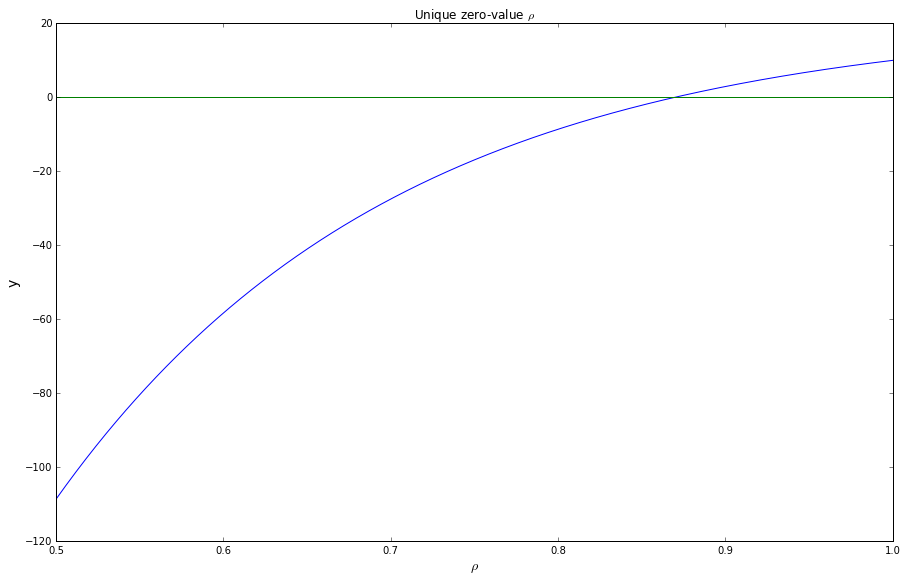

In [147]:
vrho = np.linspace(0.5,1,1001)
y = (xT+v0*t_T+v0*tau*(1-np.exp((1-vrho)*t_T/tau)))*(2-np.exp(-vrho*t_T/tau)-np.exp((1-vrho)*t_T/tau))+v0*np.exp((1-vrho)*t_T/tau)*((1-vrho)*t_T+tau*(1-np.exp((1-vrho)*t_T/tau)))-v0*np.exp((1-vrho)*t_T/tau)*(vrho*t_T-tau*(1-np.exp(-vrho*t_T/tau)))

fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
ax.plot(vrho,y)
ax.plot([0.5,1],[0,0])
ax.set_title(r'Unique zero-value $\rho$')
ax.set_xlabel(r'$\rho$', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_xlim(0.5, 1)


In [148]:
rho_pursuit = vrho[np.argmin(np.abs(y))]
Umax_pursuit = b*v0*np.exp((1-rho_pursuit)*t_T/tau)/(2-np.exp((1-rho_pursuit)*t_T/tau)-np.exp(-rho_pursuit*t_T/tau))
rhoT_pursuit = int(np.round(T*rho_pursuit))

In [149]:
Umax_pursuit

28779.763049448244

In [150]:
x_pursuit = np.concatenate((Umax_pursuit/b*(time[0:rhoT_pursuit]-m/b*(1-np.exp(-b/m*time[0:rhoT_pursuit]))),xT+v0*T*dt+Umax_pursuit/b*(T*dt-time[rhoT_pursuit:T]+m/b*(1-np.exp(b/m*(T*dt-time[rhoT_pursuit:T]))))+m/b*v0*(1-np.exp(b/m*(T*dt-time[rhoT_pursuit:T]))),xT+v0*T*dt+v0*(time[T:(T+R+1)]-t_T)))
v_pursuit = np.concatenate((Umax_pursuit/b*(1-np.exp(-b/m*time[0:rhoT_pursuit])),-Umax_pursuit/b*(1-np.exp(b/m*(T*dt-time[rhoT_pursuit:T])))+v0*np.exp(b/m*(T*dt-time[rhoT_pursuit:T])),v0*np.ones(R+1)))
u_pursuit = np.concatenate((Umax_pursuit*np.ones(rhoT_pursuit),-Umax_pursuit*np.ones(T-rhoT_pursuit),b*v0*np.ones(R+1)))

In [151]:
u_pursuit

array([ 28779.76304945,  28779.76304945,  28779.76304945, ...,
         1000.        ,   1000.        ,   1000.        ])

(-35000, 35000)

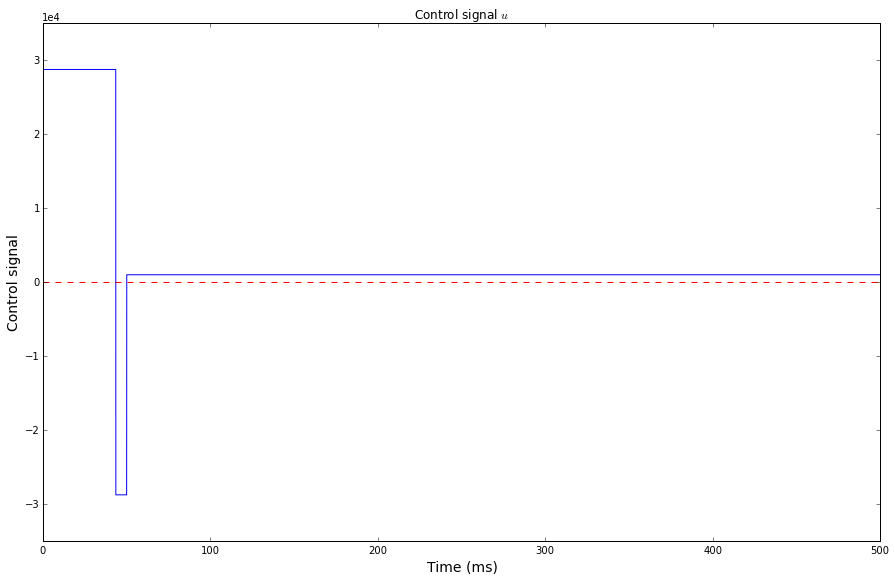

In [152]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(time_ms, u_pursuit, '-')
ax.plot([0,(t_T+t_R)*1000],[0,0], 'r--')
ax.set_title(r'Control signal $u$')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('Control signal', fontsize=14)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))
ax.set_ylim(-35000, 35000)


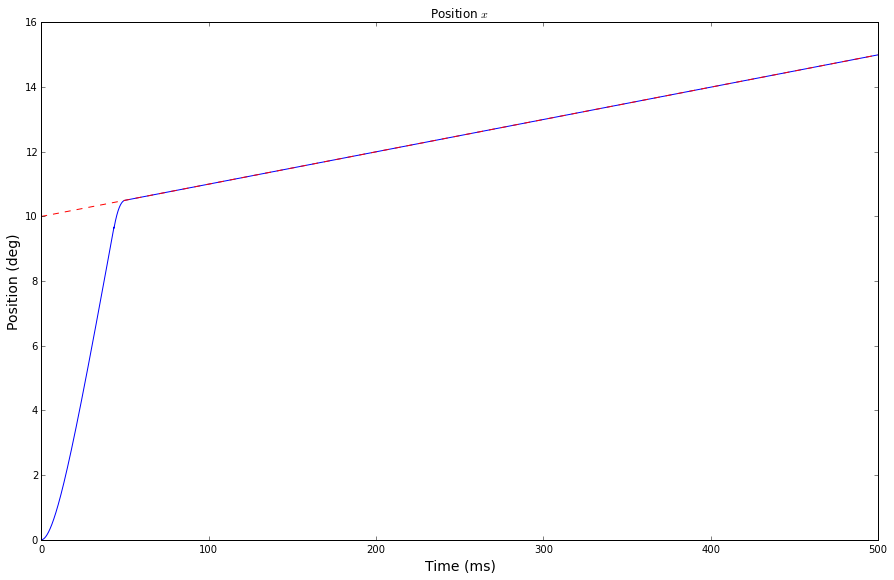

In [153]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(time_ms, x_pursuit, '-')
ax.plot([0,(t_T+t_R)*1000],[10,xT+v0*(t_T+t_R)], 'r--')
ax.set_title(r'Position $x$')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('Position (deg)', fontsize=14)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))


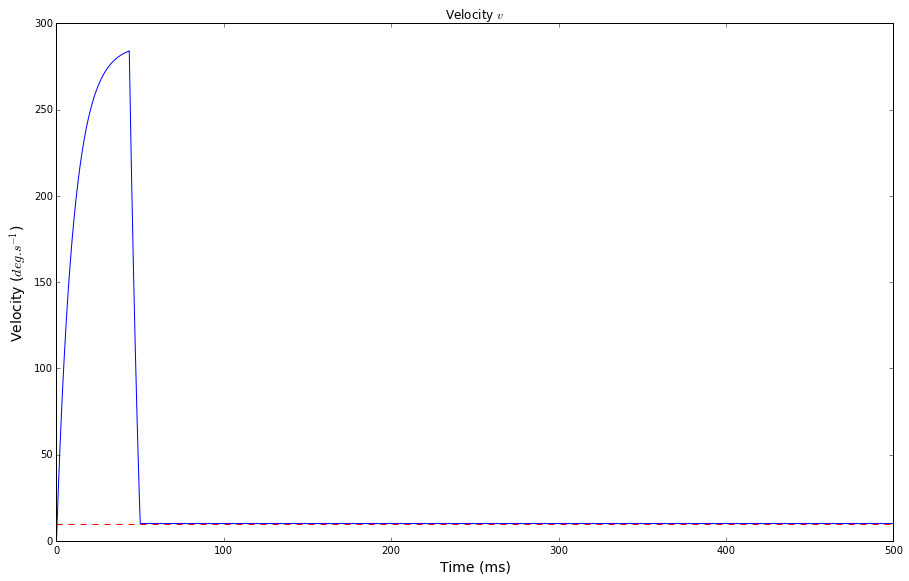

In [154]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(time_ms, v_pursuit, '-')
ax.set_title(r'Velocity $v$')
ax.plot([0,(t_T+t_R)*1000],[v0,v0], 'r--')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel(r'Velocity ($deg.s^{-1}$)', fontsize=14)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))


## Bangbang and adaptation

Here, we want to reach a target which is not the target we first see at time $t=0s$. Thus, there is a second target when the first one disappears. Several trajectories are possible.  
A naive approach consists in reaching the first target with a bangbang and then in reaching the second one with another bangbang. But, after many trials, we could predict that the trajectory will be a single bangbang that enables to reach the second target directly.  
So, it will be useful to use a "naivety" parameter that enables to show different shapes of trajectory.  

We assume:  
$$
u(t) = \mathbb 1_{\intervalle{0}{\rho\cdot T_1}} \cdot U_1 - \mathbb 1_{\intervalleof{\rho\cdot T_1}{T_1}} \cdot U_1 + \mathbb 1_{\intervalle{T_1}{r\cdot T_2}} \cdot U_2 - \mathbb 1_{\intervalleof{r\cdot T_2}{T_2}} \cdot U_2 + \mathbb 1_{\intervalleoo{T_2}{+\infty}} \cdot U_\infty
$$

We will solve the following differential equation, which represents a linear model of the eye, on the previous intervals:  
  
$$
\dfrac{d\dot{x}(t)}{dt} = -\frac{\beta}{m}\cdot\dot{x}(t)+\frac{1}{m}\cdot u(t)
$$


In [137]:
b = 100
m = 1
xT1 = 20
xT2 = 18
dt = 0.001
t_T1 = .05
t_T2 = .06
t_R = .05
T1 = int(t_T1/dt)
T2 = int(t_T2/dt)
R = int(t_R/dt)
time = np.linspace(0, 0.1, R+T1+1)
time_ms = time/dt

In [138]:
rho = -m/(b*T1*dt)*np.log(2/(1+np.exp(b*T1*dt/m)))
rhoT = int(np.round(T1*rho))
r = m/(b*T2*dt)*np.log((np.exp(b*T1*dt/m)+np.exp(b*T2*dt/m))/2)
rT = int(np.round(T2*r))

In [139]:
rho2 = -m/(b*T1*dt)*np.log(2/(1+np.exp(b*T1*dt/m)))
rhoT2 = int(np.round(T1*rho2))
r2 = m/(b*T2*dt)*np.log((np.exp(b*T1*dt/m)+np.exp(b*T2*dt/m))/2)
rT2 = int(np.round(T2*r2))

In [140]:
U1 = b*xT1/((2*rho-1)*T1*dt-m/b*(2-np.exp(-rho*b*T1*dt/m)-np.exp((1-rho)*b*T1*dt/m)))
U2 = b*(xT2-xT1)/((2*r-1)*T2*dt-T1*dt)

In [141]:
x_adapt = np.concatenate((U1/b*(time[0:(rhoT+1)]-m/b*(1-np.exp(-b/m*time[0:(rhoT+1)]))),xT1+U1/b*(T1*dt-time[(rhoT+1):(T1+1)]+m/b*(1-np.exp(b/m*(T1*dt-time[(rhoT+1):(T1+1)])))),xT1+U2/b*(time[(T1+1):(rT+1)]-T1*dt-m/b*(1-np.exp(-b/m*(time[(T1+1):(rT+1)]-T1*dt)))),xT2+U2/b*(T2*dt-time[(rT+1):(T2+1)]+m/b*(1-np.exp(b/m*(T2*dt-time[(rT+1):(T2+1)])))),xT2*np.ones(R+T1-T2)))
v_adapt = np.concatenate((U1/b*(1-np.exp(-b/m*time[0:(rhoT+1)])),-U1/b*(1-np.exp(b/m*(T1*dt-time[(rhoT+1):(T1+1)]))),U2/b*(1-np.exp(-b/m*(time[(T1+1):(rT+1)]-T1*dt))),-U2/b*(1-np.exp(b/m*(T2*dt-time[(rT+1):(T2+1)]))),np.zeros(R+T1-T2)))
u_adapt = np.concatenate((U1*np.ones(rhoT+1),-U1*np.ones(T1-rhoT),U2*np.ones(rT-T1),-U2*np.ones(T2-rT),np.zeros(R+T1-T2)))

In [142]:
rho_notnaive = -m/(b*T2*dt)*np.log(2/(1+np.exp(b*T2*dt/m)))
rhoT_notnaive = int(np.round(T2*rho_notnaive))
U_notnaive = b*xT2/((2*rho_notnaive-1)*T2*dt-m/b*(2-np.exp(-rho_notnaive*b*T2*dt/m)-np.exp((1-rho_notnaive)*b*T2*dt/m)))

In [143]:
x_notnaive = np.concatenate((U_notnaive/b*(time[0:(rhoT_notnaive+1)]-m/b*(1-np.exp(-b/m*time[0:(rhoT_notnaive+1)]))),xT2+U_notnaive/b*(T2*dt-time[(rhoT_notnaive+1):(T2+1)]+m/b*(1-np.exp(b/m*(T2*dt-time[(rhoT_notnaive+1):(T2+1)])))),xT2*np.ones(R+T1-T2)))
v_notnaive = np.concatenate((U_notnaive/b*(1-np.exp(-b/m*time[0:(rhoT_notnaive+1)])),-U_notnaive/b*(1-np.exp(b/m*(T2*dt-time[(rhoT_notnaive+1):(T2+1)]))),np.zeros(R+T1-T2)))
u_notnaive = np.concatenate((U_notnaive*np.ones(rhoT_notnaive+1),-Umax*np.ones(T2-rhoT_notnaive),np.zeros(R+T1-T2)))

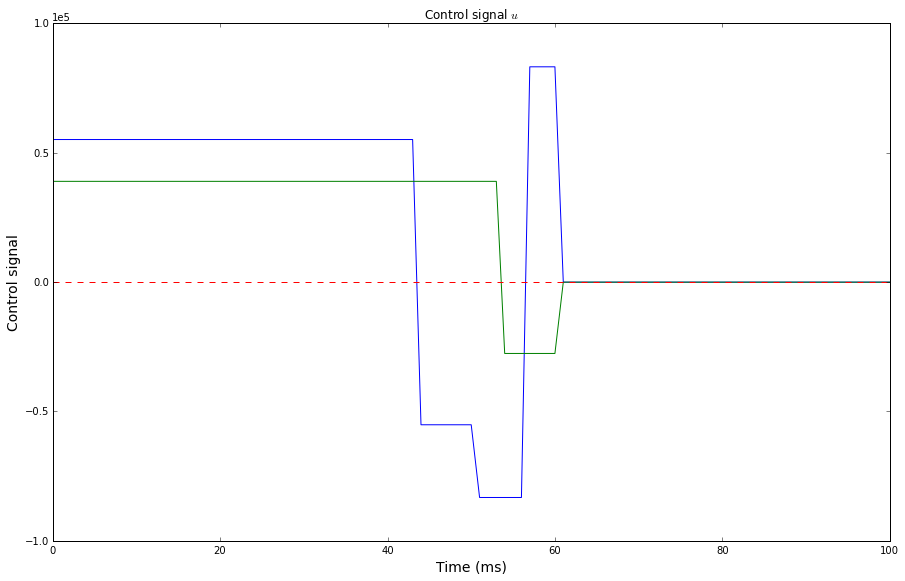

In [144]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(time_ms, u_adapt, '-')
ax.plot(time_ms, u_notnaive, '-')
ax.plot([0,100],[0,0], 'r--')
ax.set_title(r'Control signal $u$')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('Control signal', fontsize=14)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))
#ax.set_xlim(0, 150)


(-0.5, 20.5)

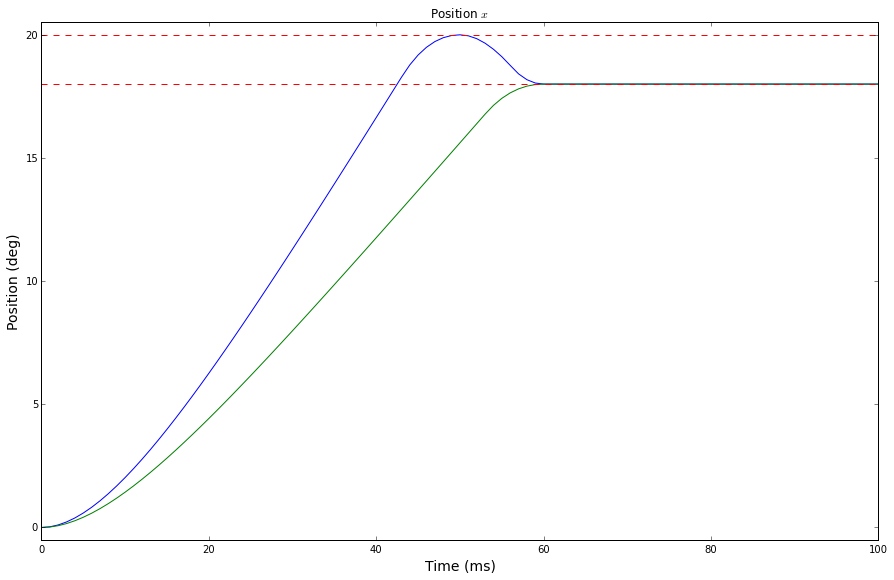

In [145]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(time_ms, x_adapt, '-')
ax.plot(time_ms, x_notnaive, '-')
ax.plot([0,100],[xT1,xT1], 'r--')
ax.plot([0,100],[xT2,xT2], 'r--')

ax.set_title(r'Position $x$')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('Position (deg)', fontsize=14)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))

ax.set_ylim(-0.5, max(xT1,xT2)+0.5)


(-390.63186606818283, 558.91748732233111)

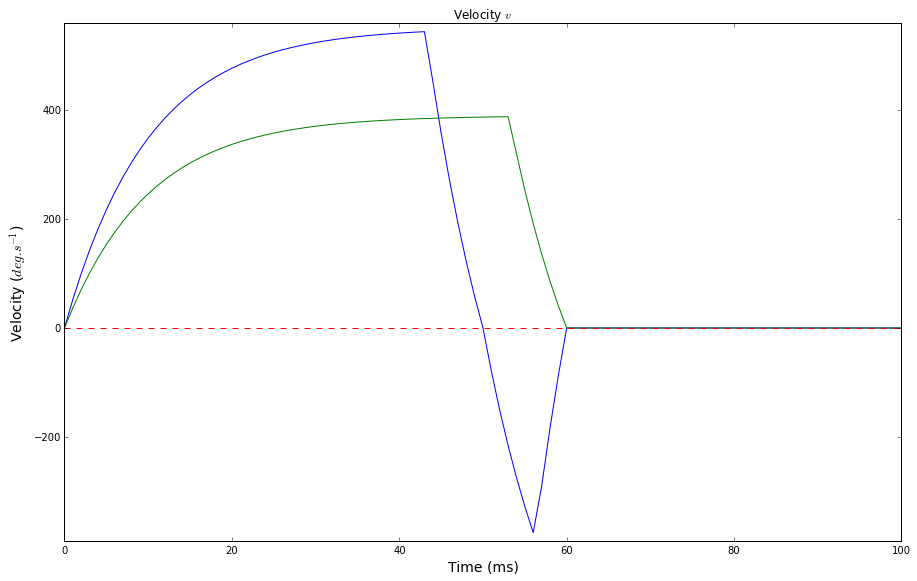

In [146]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(time_ms, v_adapt, '-')
ax.plot(time_ms, v_notnaive, '-')
ax.plot([0,100],[0,0], 'r--')

ax.set_title(r'Velocity $v$')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel(r'Velocity ($deg.s^{-1}$)', fontsize=14)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))

ax.set_ylim(min(v_adapt)-15, max(v_adapt)+15)